# Problem Statement:

# This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# solution : dependent variable is to finding the status whether loan has been approved or not based on previous record .so its basicallya classification problem.so we can proceed.

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# DATA PREPROCESSING

In [4]:
df.shape

(614, 13)

- number of rows =614
- number of columns = 13

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#Checking types of datset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here I can see dataset contains different features with different data types. In this dataset 2 types of data are preset object and float, will take care of the object type data using encoding techniques in further process.

In [7]:
#Will separate categorical and numerical columns
categorical_cols = []
numerical_cols = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print('Categorical Columns are : ', categorical_cols)
print('************************************************************************************************************************')
print('Numerical Columns are: ', numerical_cols)


Categorical Columns are :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
************************************************************************************************************************
Numerical Columns are:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [8]:
#Checking dataset ifno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


OBSERVATION
- we observe that few gender column has missing value and many other columns has missing values too.there are total 8 object classand 5 numerical columns also

In [161]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# observation
- in the applicant column we see that std is more than mean which make no sense and also jump from 75% to max is also very high so we
look into this.
- similar observation is noticed in coapplication columns.

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

few null values exists in many columns

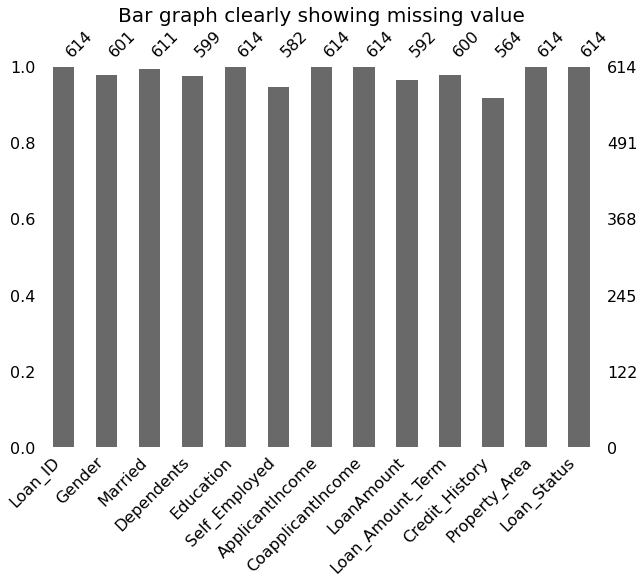

In [10]:
ms.bar(df,figsize=(10,7))
plt.title("Bar graph clearly showing missing value",size=20);

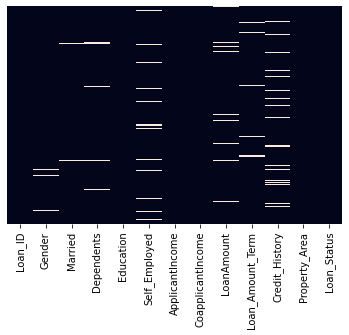

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

from the above two graphs we conclude that null value exists

In [12]:
#Checking unique values of the dataset
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
#Loan id are unique and of no use for prediction so we drop this column

df.drop(columns = ['Loan_ID'], axis = 1, inplace = True)

In [15]:
df.shape

(614, 12)

# Treating the Null values

In [16]:
# Modes of categorical columns
print("The mode of Gender is:",df["Gender"].mode())
print("The mode of Married is:",df["Married"].mode())
print("The mode of Dependents is:",df["Dependents"].mode())
print("The mode of  Self_Employed  is:",df["Self_Employed"].mode())
print("The mode of Loan_Amount_Term is:",df["Loan_Amount_Term"].mode())
print("The mode of Credit_History  is:",df["Credit_History"].mode())

The mode of Gender is: 0    Male
Name: Gender, dtype: object
The mode of Married is: 0    Yes
Name: Married, dtype: object
The mode of Dependents is: 0    0
Name: Dependents, dtype: object
The mode of  Self_Employed  is: 0    No
Name: Self_Employed, dtype: object
The mode of Loan_Amount_Term is: 0    360.0
Name: Loan_Amount_Term, dtype: float64
The mode of Credit_History  is: 0    1.0
Name: Credit_History, dtype: float64


In [17]:
# Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

# all the above categorical column is filled up by mode.

# Since LoanAmount column is a numerical column we shall replace the null values with median of this column.

In [18]:
# Median of numerical column
print("The median of LoanAmount is:",df["LoanAmount"].median())

The median of LoanAmount is: 128.0


In [19]:
# Filling null values in LoanAmount by its median value
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

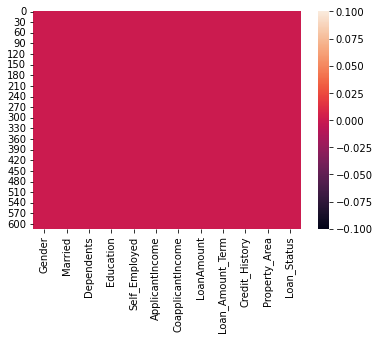

In [21]:
# Visualizing the null values
sns.heatmap(df.isnull())

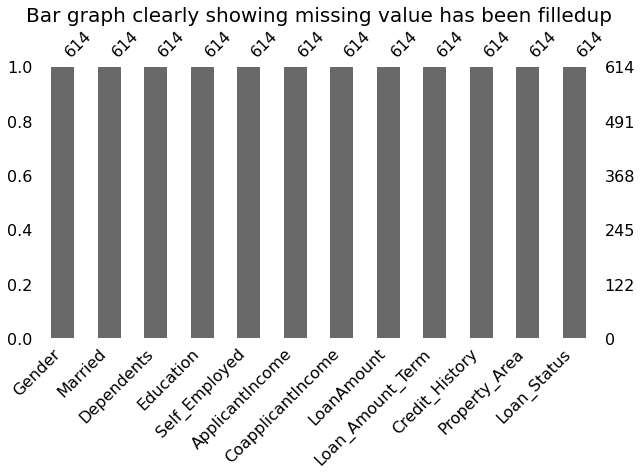

In [22]:
ms.bar(df,figsize=(10,5))
plt.title("Bar graph clearly showing missing value has been filledup",size=20);

we have treated the null values well as ni missing values observed from the above plots

# DATA VISUALIZATION

In [23]:
#value count of each columns

for i in df.columns:
        print(df[i].value_counts())
        print('#' * 50)

Male      502
Female    112
Name: Gender, dtype: int64
##################################################
Yes    401
No     213
Name: Married, dtype: int64
##################################################
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
##################################################
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
##################################################
No     532
Yes     82
Name: Self_Employed, dtype: int64
##################################################
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
##################################################
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
############################

# Univariate Analysis

In [24]:
#Checking columns of the dataset
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# 1. For Gender

In [25]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

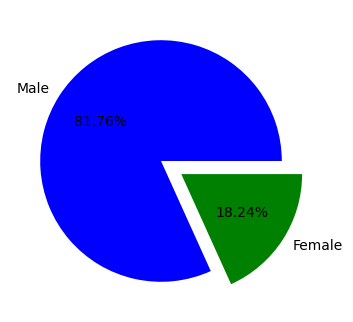

AxesSubplot(0.125,0.125;0.775x0.755)


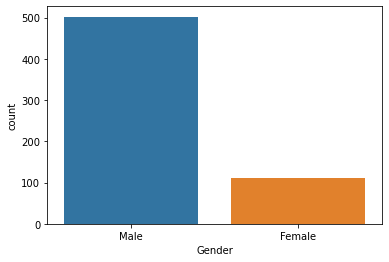

In [26]:
labels = ['Male','Female']
fig, ax = plt.subplots(dpi=100)
cl = ['blue','green']
plt.legend
exp = [0.0,0.2]
plt.pie(df['Gender'].value_counts(),labels = labels,explode = exp,radius =1, autopct = '%1.2f%%', shadow=False,colors=cl)
plt.show()

print(sns.countplot(data=df,x='Gender'))

# from the above we conclude that loan application submitted by male candidates are far greater than female class so we have to focuss more on women class to create gender equality and growing the bussiness.

# 2 For Married

In [27]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

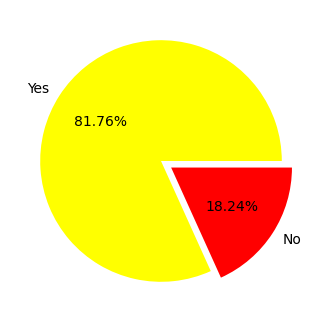

AxesSubplot(0.125,0.125;0.775x0.755)


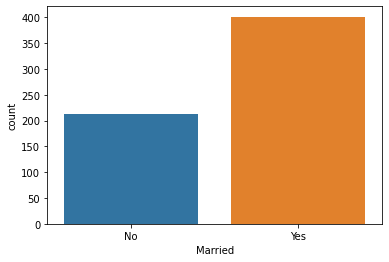

In [28]:
labels = ['Yes','No']
fig, ax = plt.subplots(dpi=100)
cl = ['yellow','red']
plt.legend
exp = [0.0,0.1]
plt.pie(df['Gender'].value_counts(),labels = labels,explode = exp,radius =1, autopct = '%1.2f%%', shadow=False,colors=cl)
plt.show()

print(sns.countplot(data=df,x='Married'))

As obvious married couples needs loan more than any unmarried classcitizen

# 3. For Dependents

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:ylabel='Dependents'>

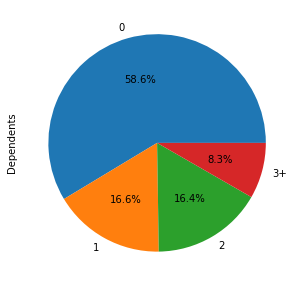

In [29]:
plt.figure(figsize=(10,5))
print(df['Dependents'].value_counts())
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')

AxesSubplot(0.125,0.125;0.775x0.755)


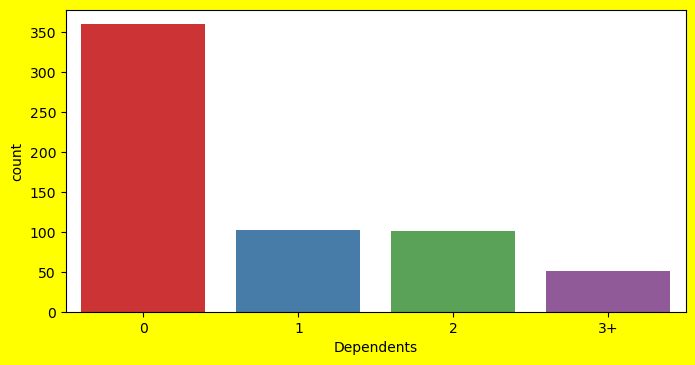

In [30]:
plt.figure(figsize=(8,4),dpi=100,facecolor='yellow')
print(sns.countplot(data=df,x='Dependents',palette='Set1'))

# 4 For Education

In [31]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

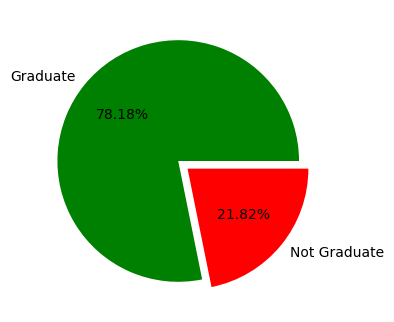

AxesSubplot(0.125,0.125;0.775x0.755)


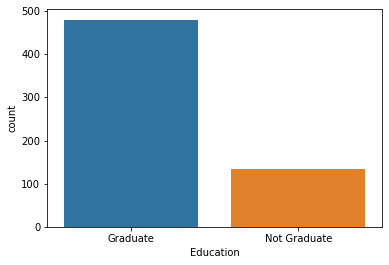

In [32]:
labels = ['Graduate','Not Graduate']
fig, ax = plt.subplots(dpi=100)
cl = ['green','red']
plt.legend
exp = [0.0,0.1]
plt.pie(df['Education'].value_counts(),labels = labels,explode = exp,radius =1, autopct = '%1.2f%%', shadow=False,colors=cl)
plt.show()

print(sns.countplot(data=df,x='Education'))

those who are graduated require loan because they have to invest in startup and other fruitful purpose so they must be our target point

# 5. For self employed

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:ylabel='Self_Employed'>

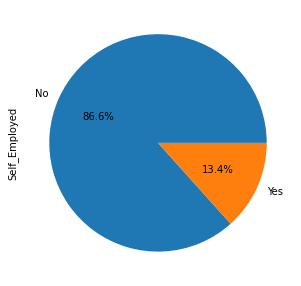

In [33]:
plt.figure(figsize=(10,5))
print(df['Self_Employed'].value_counts())
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')


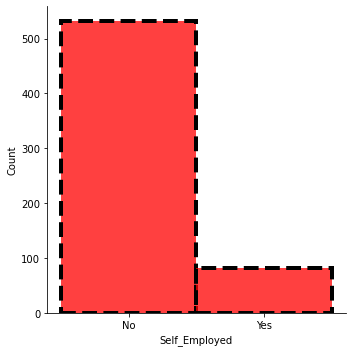

In [34]:
sns.displot(data=df,x='Self_Employed',bins=20,kde=False,
            color='red',edgecolor='black',lw=4,ls='--')

caution . maximun number of self employed not apply for loan or there may be some more reason.we have to check the lacunae behind 
the loan policy and try to influence these class also for loan as they are trustworthy class

# 6 for Applicant income

<Figure size 864x360 with 0 Axes>

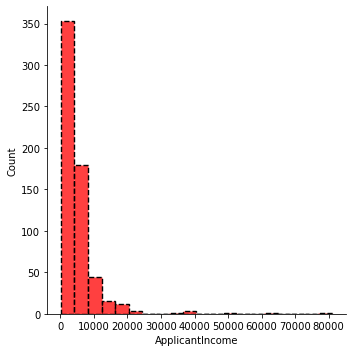

In [35]:
plt.figure(figsize=(12,5))
sns.displot(data=df,x='ApplicantIncome',bins=20,kde=False,
            color='red',edgecolor='black',lw=4,ls='--')

# as income increases loan required is less so some more attractives offers should be given to target high earning customers.

# 7. for coapplicant income

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

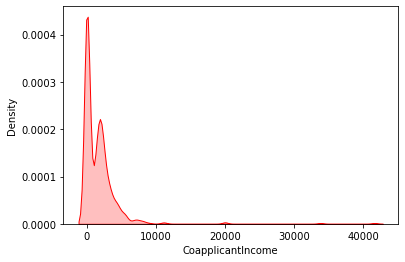

In [36]:
sns.kdeplot(data=df,x='CoapplicantIncome',bw_adjust=0.5,shade=True,color='red')

# 8 Loan amount

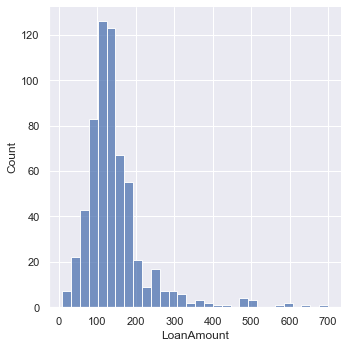

In [37]:
sns.set(style='darkgrid')
sns.displot(data=df,x='LoanAmount',bins=30)

# 9. for Loan_Amount_Term

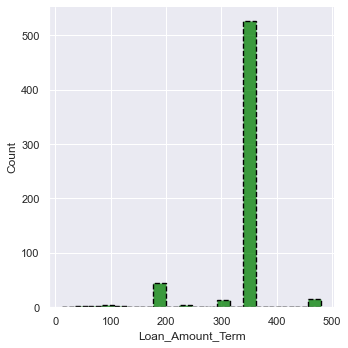

In [38]:
sns.displot(data=df,x='Loan_Amount_Term',bins=20,kde=False,
            color='green',edgecolor='black',lw=4,ls='--')

# 10. Credit history

1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:ylabel='Credit_History'>

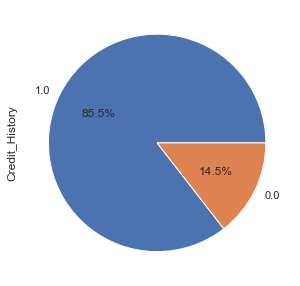

In [39]:
plt.figure(figsize=(10,5))
print(df['Credit_History'].value_counts())
df['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')


# 11. Property_Area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:ylabel='Property_Area'>

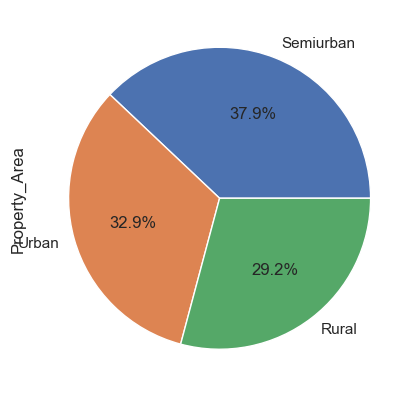

In [40]:
plt.figure(figsize=(10,5),dpi=100)
print(df['Property_Area'].value_counts())
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')

one interesting observation is noticed here that more or less rural,urban and semiurban residence all apply for loan. which is good sign

# 12. Loan status

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:ylabel='Loan_Status'>

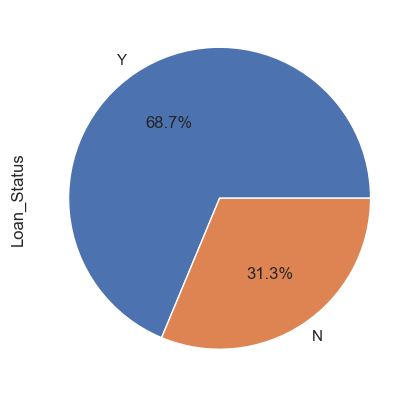

In [41]:
plt.figure(figsize=(10,5),dpi=100)
print(df['Loan_Status'].value_counts())
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')

# Bi-Variate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

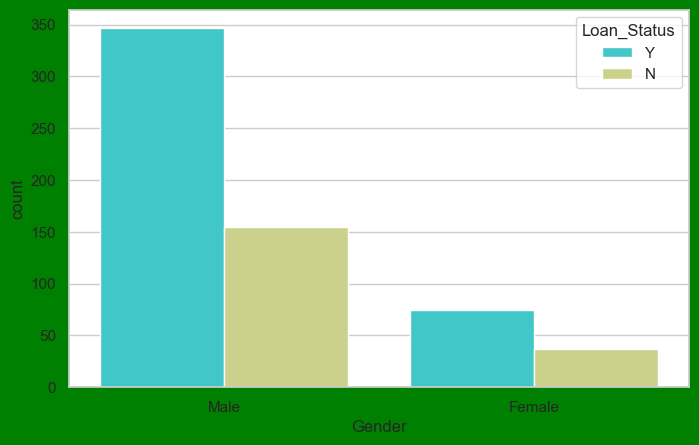

In [42]:
plt.figure(figsize=(8,5),dpi=100,facecolor='green')
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Loan_Status',data=df,palette='rainbow')

# it has been observed that although male applied for loan is greater than female but approval of loan is more for female than male .

<AxesSubplot:xlabel='Married', ylabel='count'>

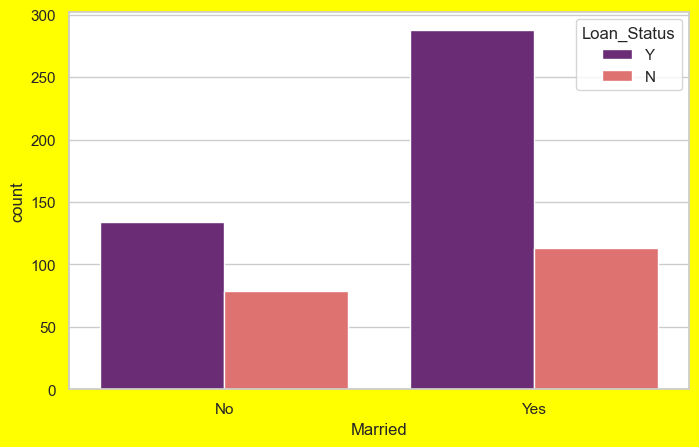

In [43]:
plt.figure(figsize=(8,5),dpi=100,facecolor='yellow')
sns.set_style('whitegrid')
sns.countplot(x='Married',hue='Loan_Status',data=df,palette='magma')

# Approx 45 percent loan approval for married people more than 50 per for unmarried.

<AxesSubplot:xlabel='Gender', ylabel='CoapplicantIncome'>

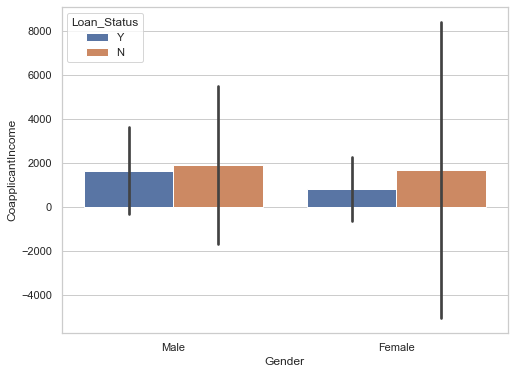

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x='Gender',y='CoapplicantIncome',data=df,estimator=np.mean,ci='sd',hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

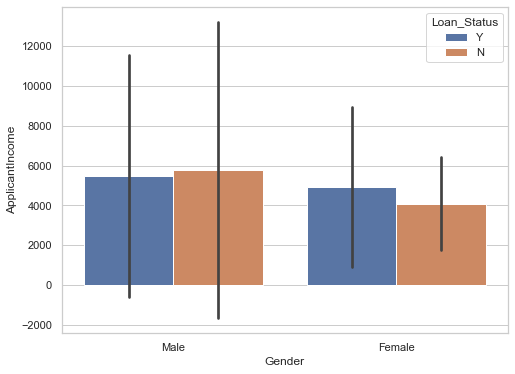

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x='Gender',y='ApplicantIncome',data=df,estimator=np.mean,ci='sd',hue='Loan_Status')

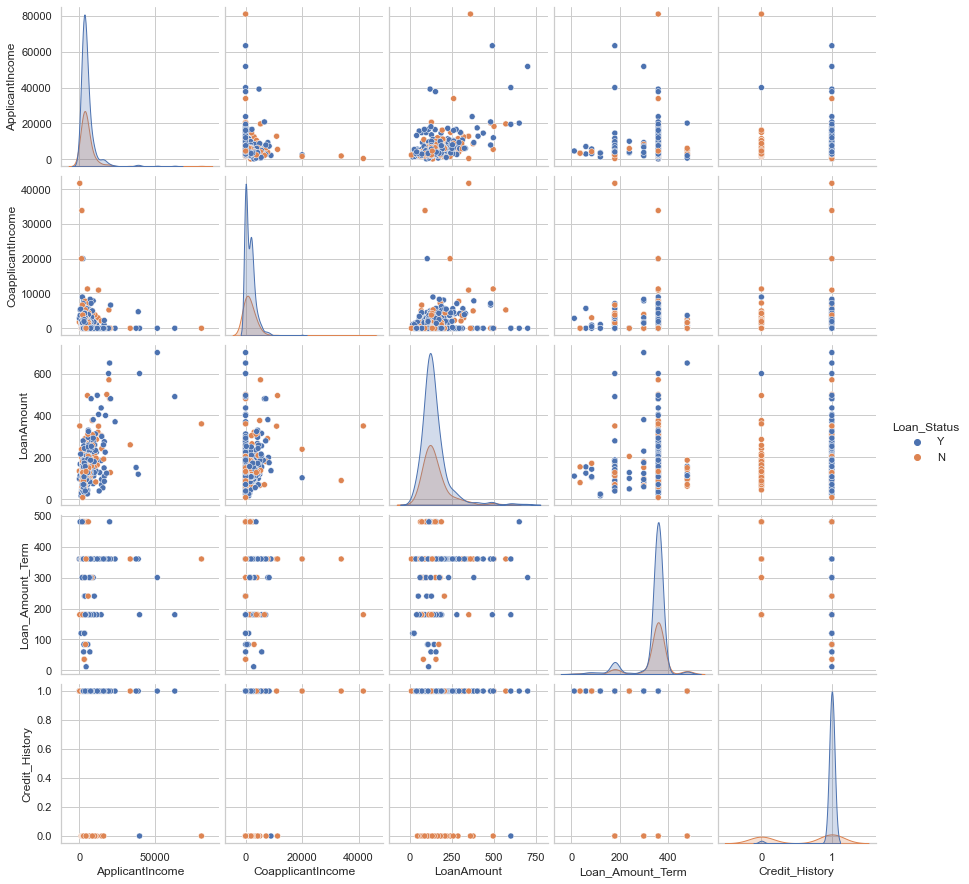

In [46]:
sns.pairplot(df,hue="Loan_Status")

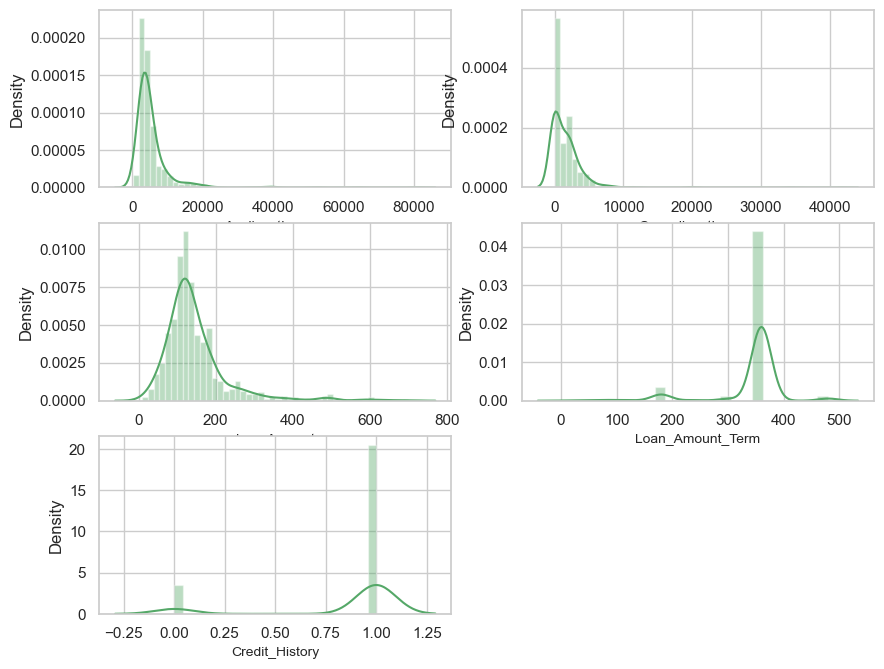

In [47]:
new_df = df.select_dtypes(exclude='object')
plt.figure(figsize=(10,8),dpi=100)
graph = 1
for column in new_df:
    if graph<=6:
        plt.subplot(3,2,graph)
        sns.distplot(new_df[column],color='g')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

# Treating categorical column 

In [48]:
new_df = df.select_dtypes(exclude='object')
new_df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0


In [49]:
my_object_df = df.select_dtypes(include = 'object')
my_object_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N


In [50]:
df_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [51]:
df_dummies

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1
610,1,1,0,0,1,0,0,0,0,1
611,1,1,1,0,0,0,0,0,1,1
612,1,1,0,1,0,0,0,0,1,1


In [52]:
df = pd.concat([new_df,df_dummies],axis=1)

In [53]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


# Analysing outliers

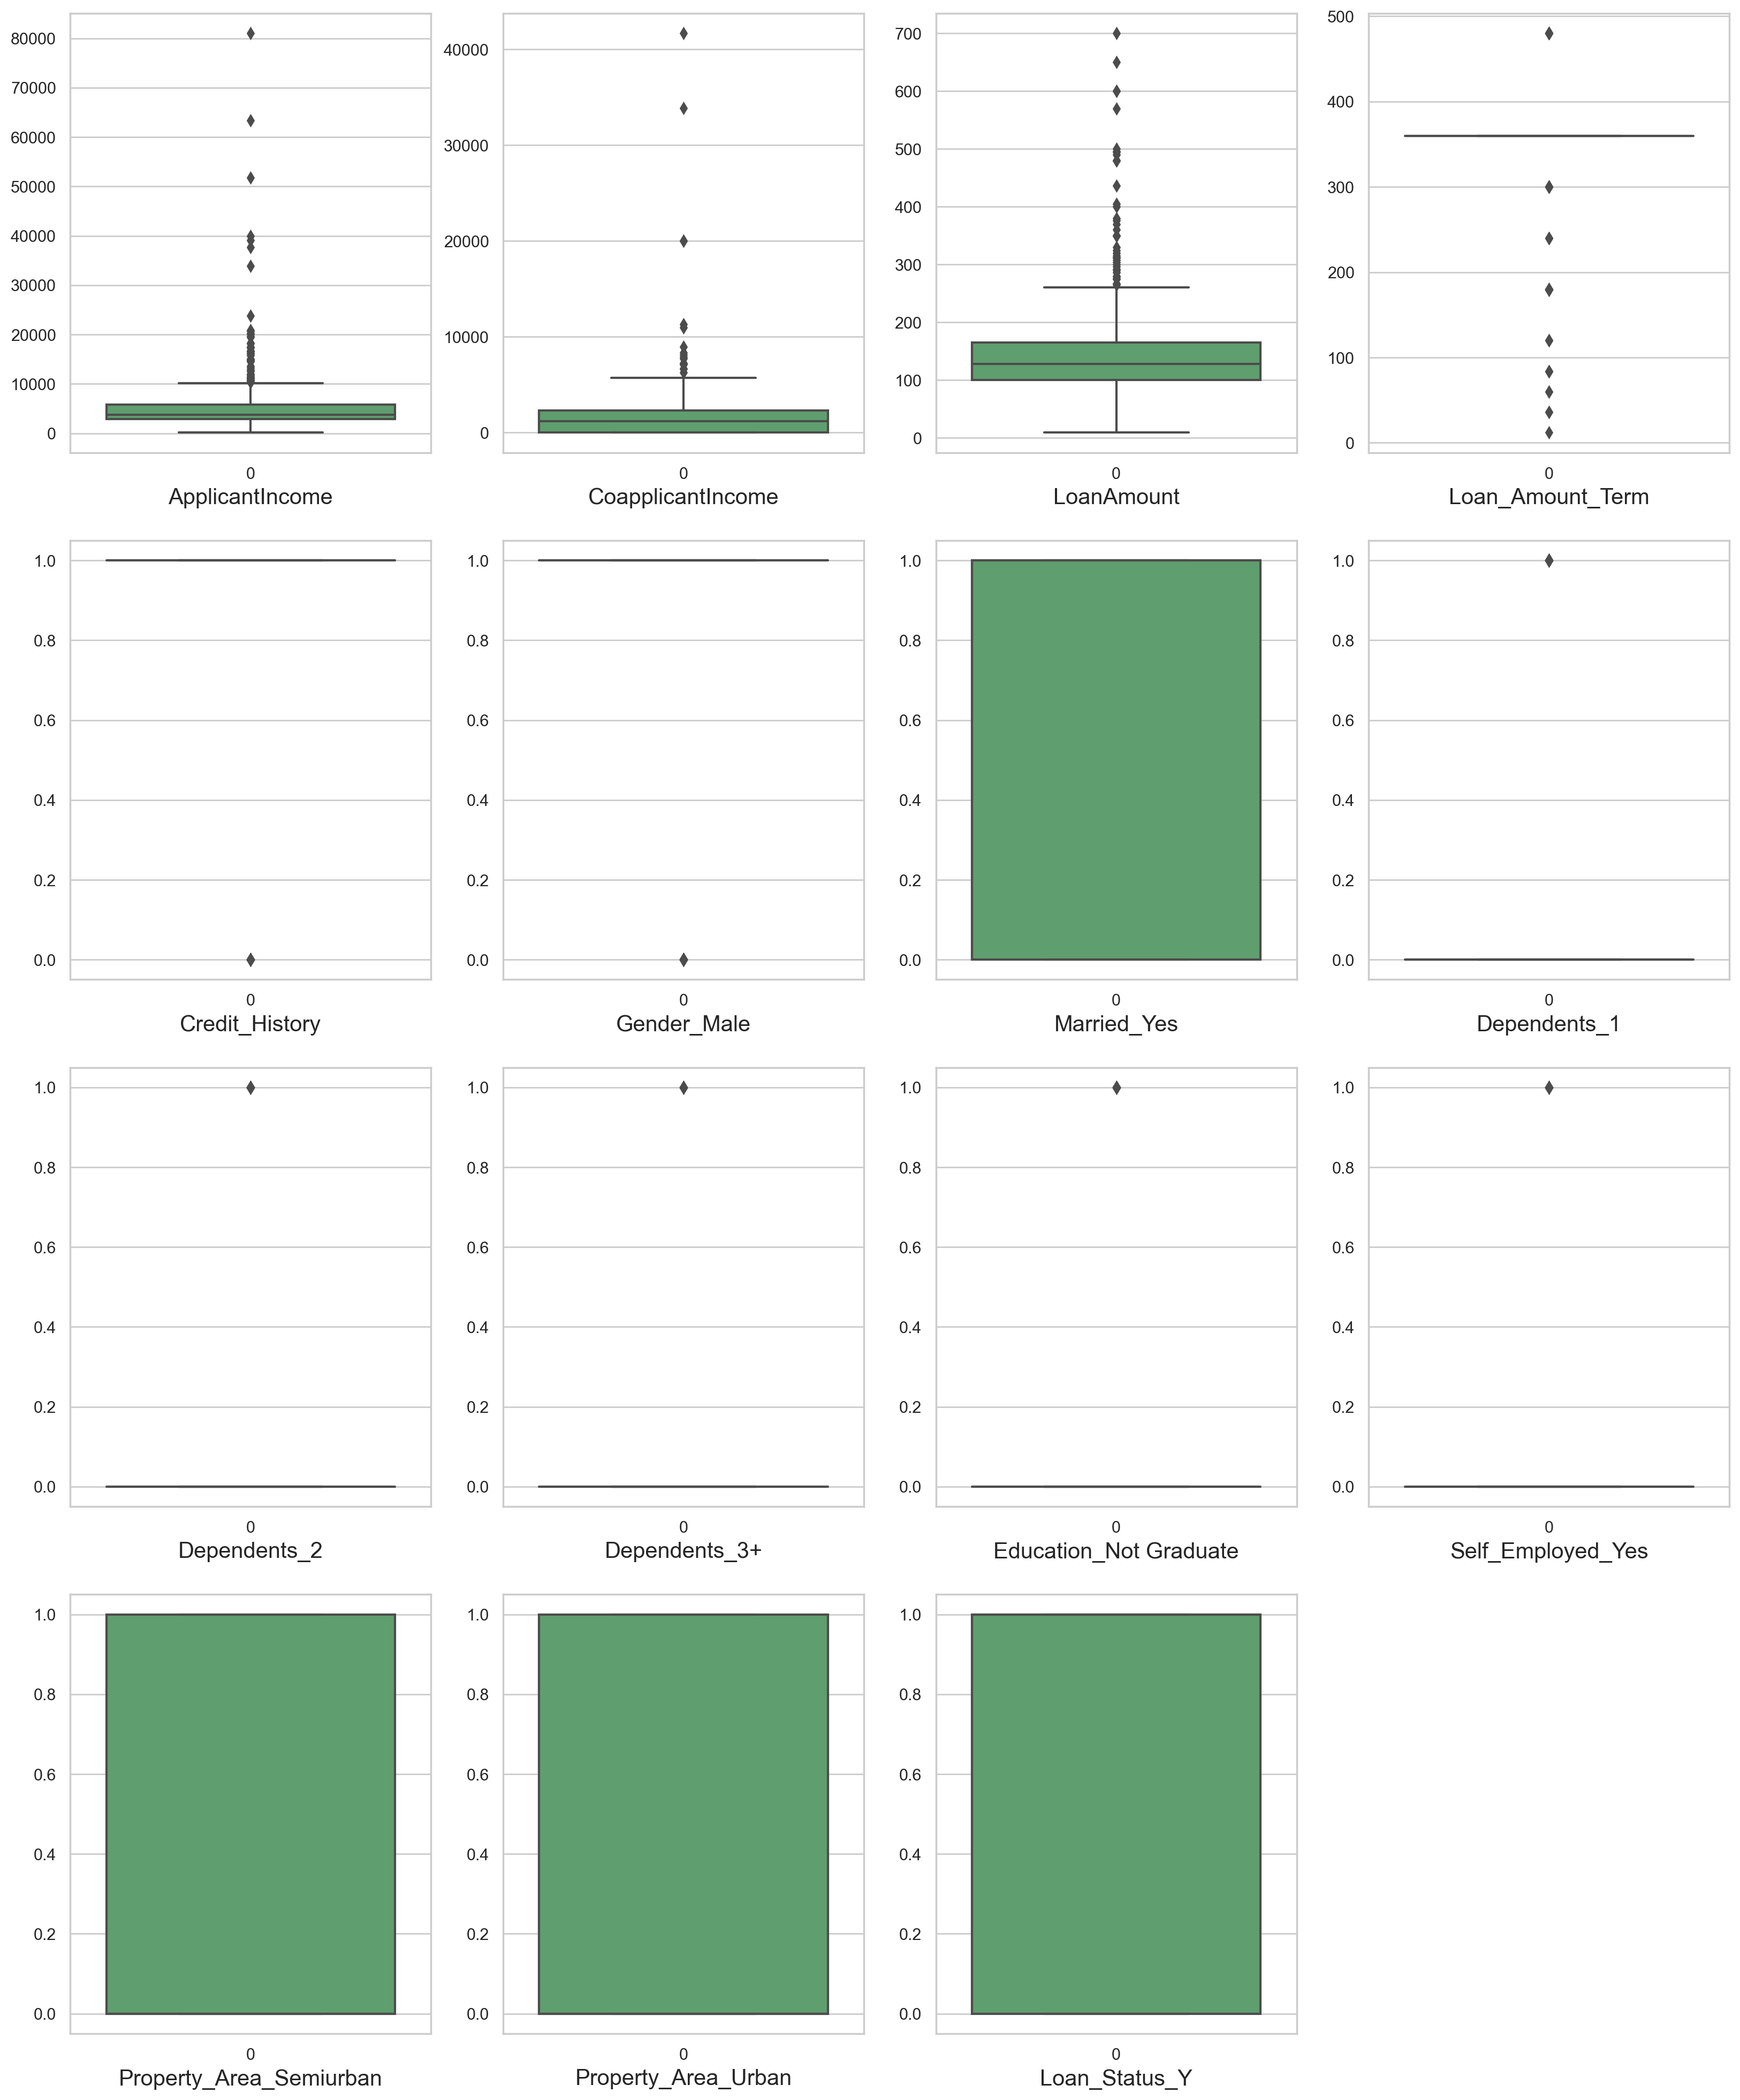

In [54]:
#Check for outliers using box plot

plt.figure(figsize=(20,25),dpi=200)
graph = 1
for column in df:
    if graph<=16:
        plt.subplot(4,4,graph)
        sns.boxplot(data=df[column],color='g')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

we observe huge outliers in the many columns so it may leads to huge data loss if IQR is applied so using z score we treat the 
outliers

# Using z score method to remove outliers

In [55]:
from scipy.stats import zscore
from scipy.stats import zscore
z = zscore(df)
z.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147,0.674519
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208,-1.482537


In [56]:
new_data = df[(z < 3).all(axis = 1)]
new_data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [57]:
#Checking skewness
df.skew()

ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.402112
Credit_History            -2.021971
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Education_Not Graduate     1.367622
Self_Employed_Yes          2.159796
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Loan_Status_Y             -0.809998
dtype: float64

In [58]:
#Checking skewness for new data
new_data.skew()

ApplicantIncome            2.219319
CoapplicantIncome          1.312390
LoanAmount                 1.088427
Loan_Amount_Term          -2.517456
Credit_History            -2.040758
Gender_Male               -1.530317
Married_Yes               -0.550514
Dependents_1               1.702034
Dependents_2               1.669163
Dependents_3+              0.000000
Education_Not Graduate     1.364437
Self_Employed_Yes          2.248820
Property_Area_Semiurban    0.517827
Property_Area_Urban        0.694450
Loan_Status_Y             -0.839248
dtype: float64

In [59]:
print(new_data.shape)
print(df.shape)

(544, 15)
(614, 15)


In [60]:
#Printing data loss
data_loss = (614 - 544)/614 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  11.400651465798045


In [61]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [62]:
features = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Gender_Male","Married_Yes","Dependents_1","Dependents_2","Education_Not Graduate",'Self_Employed_Yes']

In [63]:
new_data[features] = scaler.fit_transform(new_data[features].values)
new_data[features].skew()

ApplicantIncome           0.030309
CoapplicantIncome        -0.214916
LoanAmount                0.065399
Loan_Amount_Term          0.440976
Credit_History           -2.040758
Gender_Male              -1.530317
Married_Yes              -0.550514
Dependents_1              1.702034
Dependents_2              1.669163
Education_Not Graduate    1.364437
Self_Employed_Yes         2.248820
dtype: float64

In [64]:
new_data[np.abs(new_data)>0.25].all()

ApplicantIncome            True
CoapplicantIncome          True
LoanAmount                 True
Loan_Amount_Term           True
Credit_History             True
Gender_Male                True
Married_Yes                True
Dependents_1               True
Dependents_2               True
Dependents_3+              True
Education_Not Graduate     True
Self_Employed_Yes          True
Property_Area_Semiurban    True
Property_Area_Urban        True
Loan_Status_Y              True
dtype: bool

# Skewness is removed perfectly

In [65]:
new_data.corr()['Loan_Status_Y'].sort_values(ascending=False)

Loan_Status_Y              1.000000
Credit_History             0.557846
Property_Area_Semiurban    0.153325
Married_Yes                0.104171
CoapplicantIncome          0.096844
Dependents_2               0.063098
Gender_Male                0.021582
ApplicantIncome           -0.020344
Dependents_1              -0.036898
LoanAmount                -0.037029
Property_Area_Urban       -0.040672
Self_Employed_Yes         -0.045723
Loan_Amount_Term          -0.080548
Education_Not Graduate    -0.081643
Dependents_3+                   NaN
Name: Loan_Status_Y, dtype: float64

In [66]:
new_data['Dependents_3+'].value_counts()

0    544
Name: Dependents_3+, dtype: int64

In [67]:
new_data.drop(columns = ['Dependents_3+'], axis = 1, inplace = True)

<AxesSubplot:>

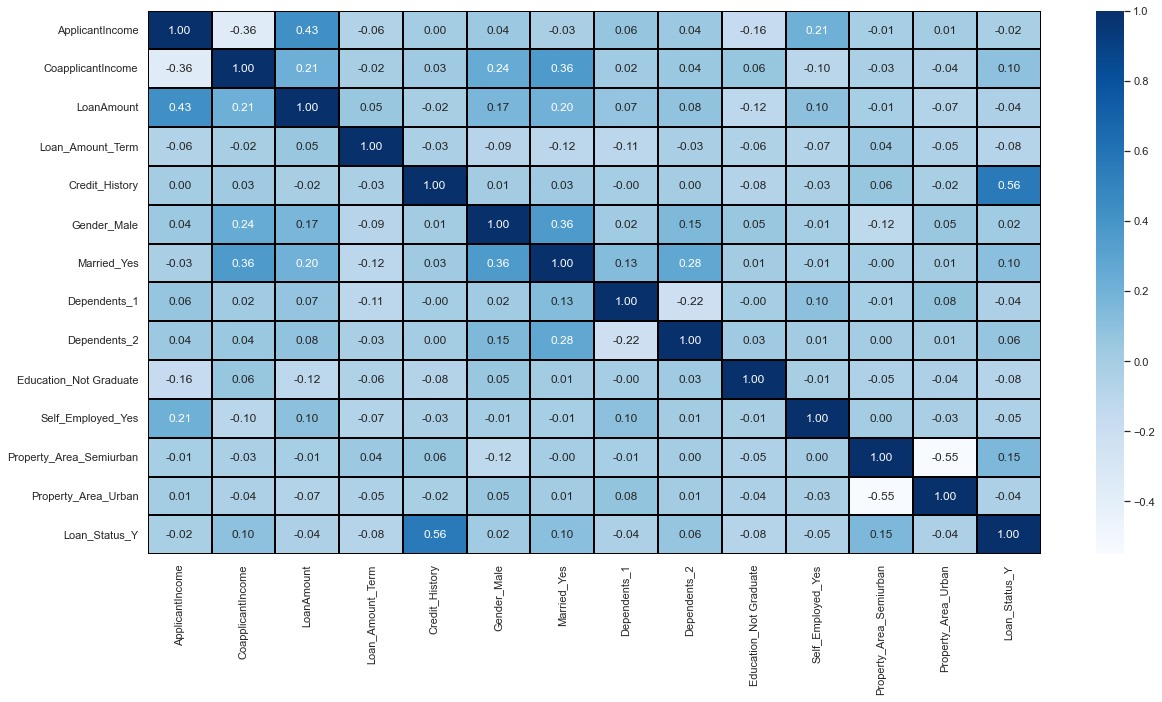

In [68]:
# Visualizing new_data.corr() using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(new_data.corr(),cmap='Blues',annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

As we observe that none of the features has strong correlation with each other so no need to drop any features

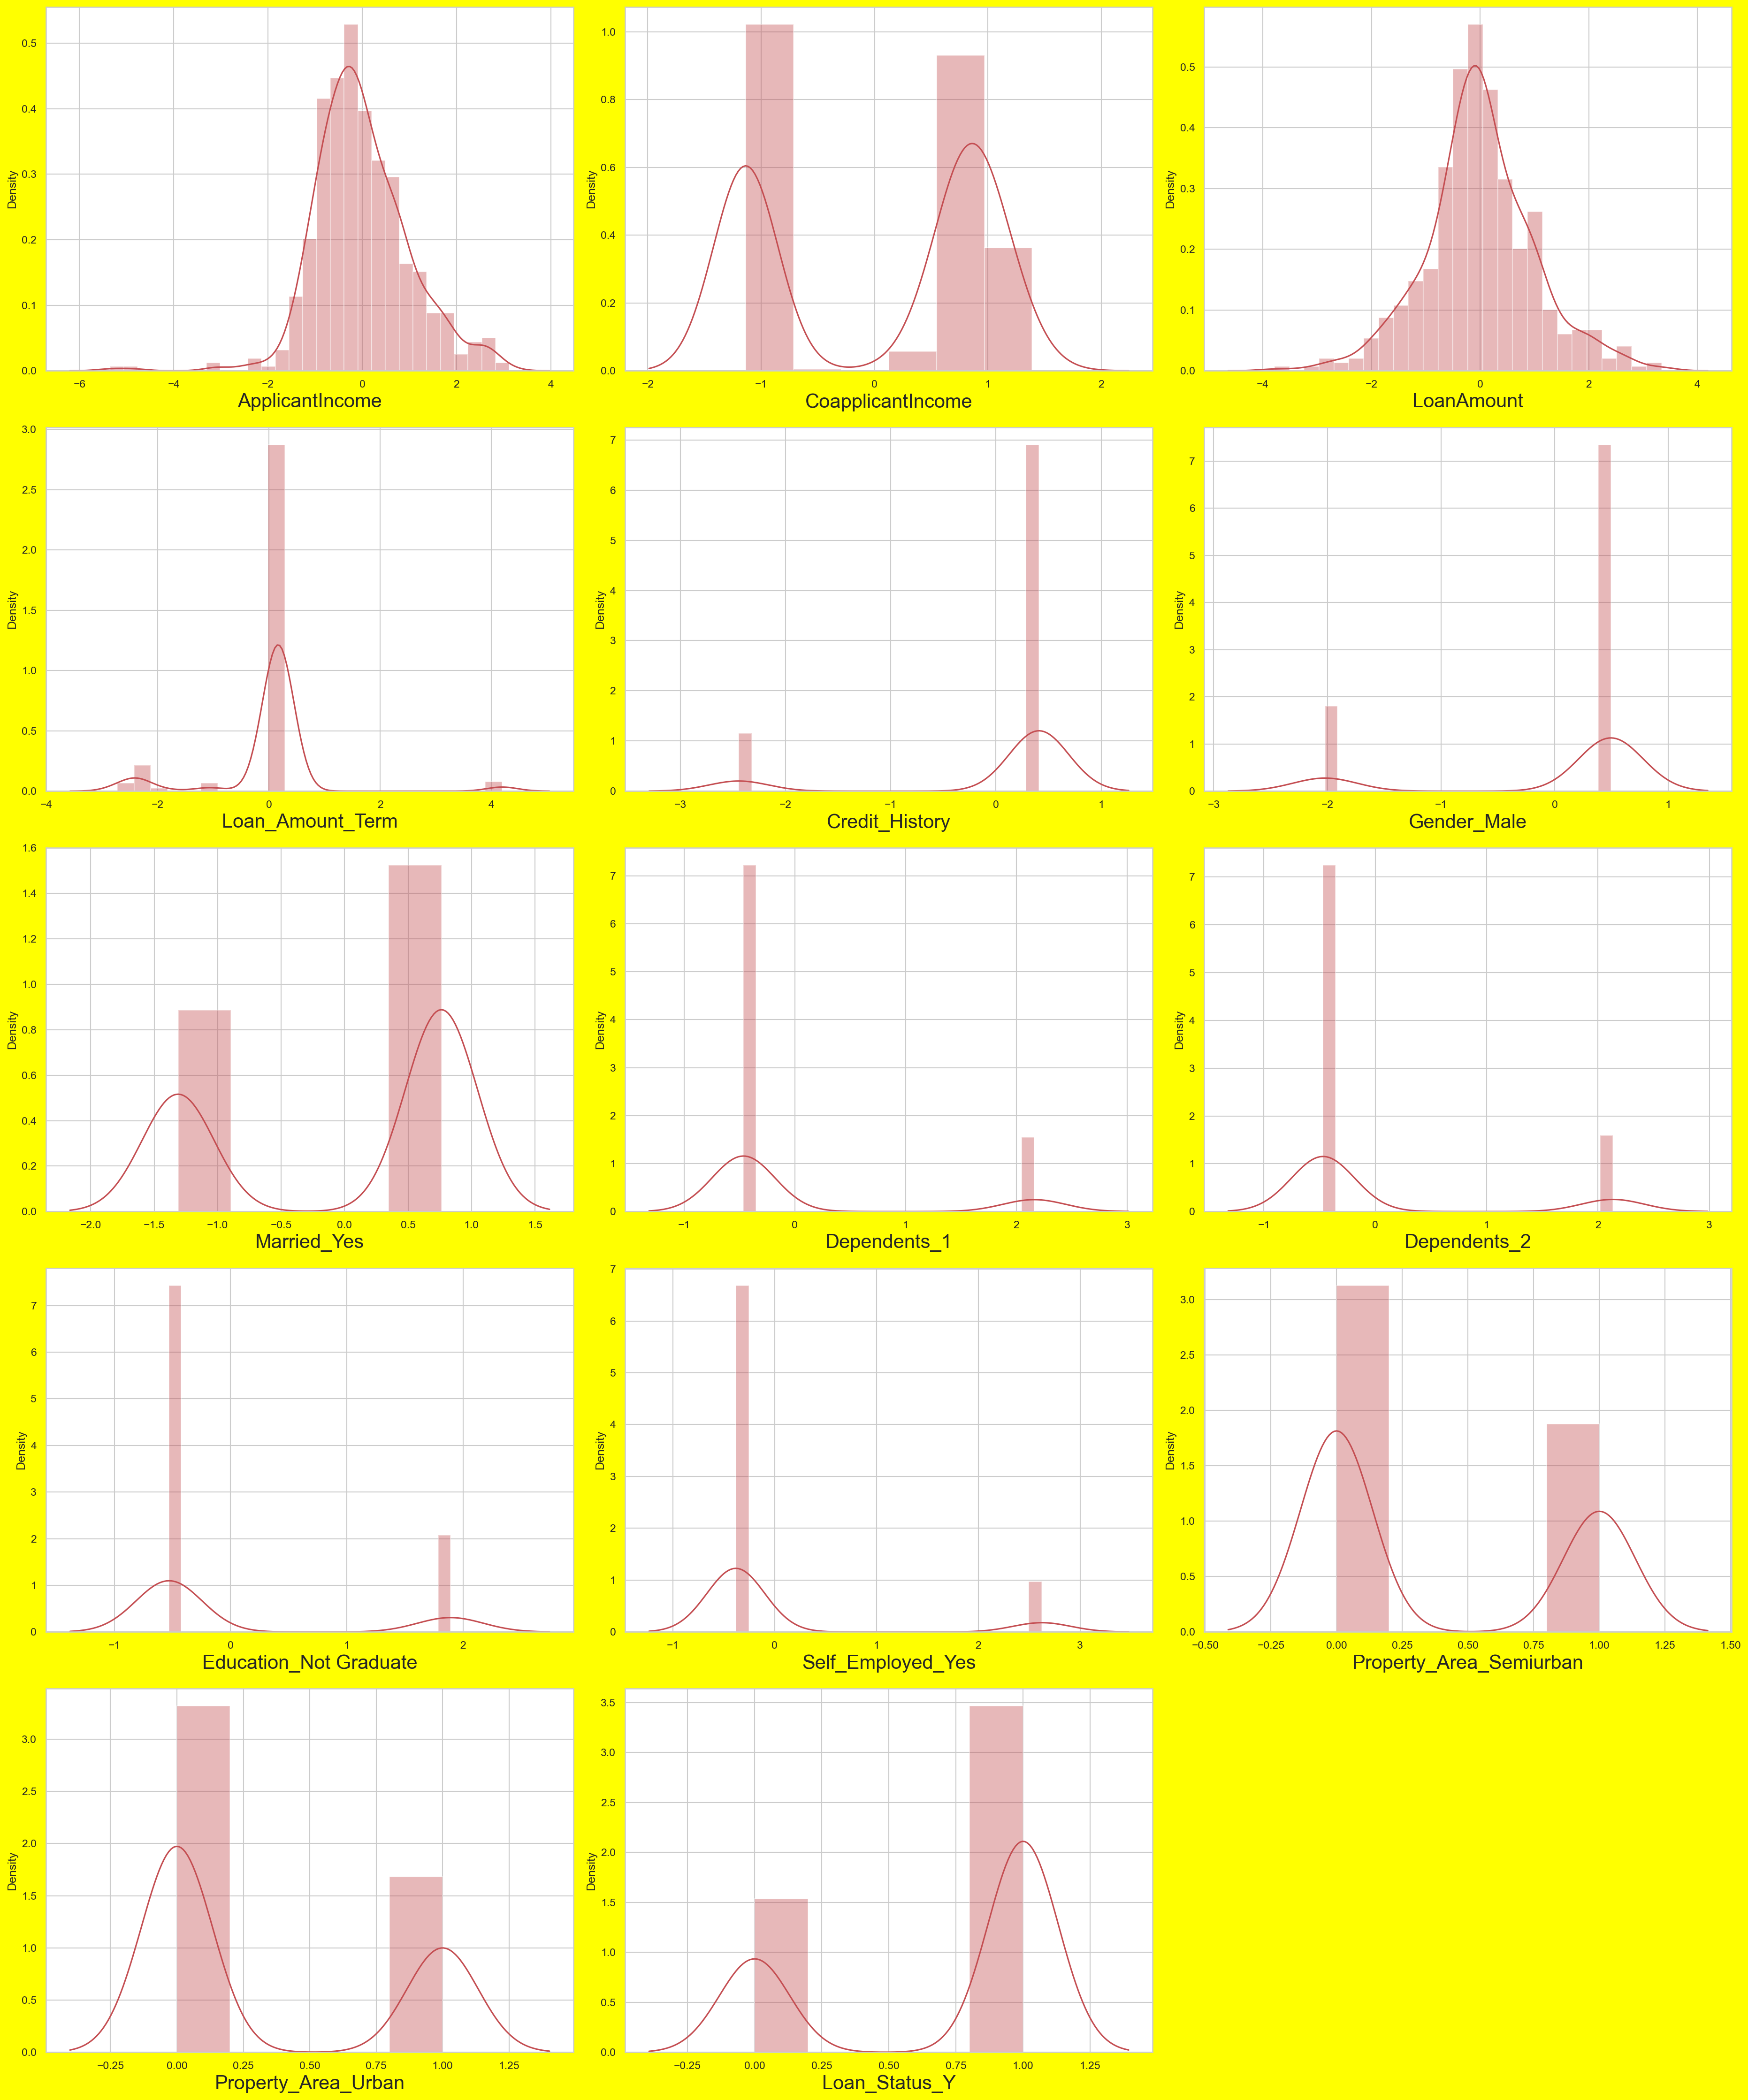

In [69]:
#Checking how data is distributed for every column.
plt.figure(figsize = (25,30),facecolor='yellow',dpi=150)

plotnumber = 1

for col in new_data:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(new_data[col], color = 'r')
        plt.xlabel(col, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# Model Building

In [70]:
x = new_data.drop("Loan_Status_Y",axis=1)
y = new_data["Loan_Status_Y"]

In [71]:
x.shape

(544, 13)

In [72]:
y.shape

(544,)

# Checking for multicollinearity problem using VIF

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,ApplicantIncome,1.760472
1,CoapplicantIncome,1.629864
2,LoanAmount,1.572123
3,Loan_Amount_Term,1.057038
4,Credit_History,1.013638
5,Gender_Male,1.212206
6,Married_Yes,1.431632
7,Dependents_1,1.130178
8,Dependents_2,1.183215
9,Education_Not Graduate,1.049047


no multicollinearity exists as confirmed from above number

# Data Standardization

In [74]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.706475,-1.136820,0.017878,0.164462,0.409123,0.494824,-1.311488,-0.462910,-0.468755,-0.529150,-0.381134,-0.774597,1.404520
1,0.260529,0.726146,0.017878,0.164462,0.409123,0.494824,0.762493,2.160247,-0.468755,-0.529150,-0.381134,-0.774597,-0.711987
2,-0.499017,-1.136820,-1.370592,0.164462,0.409123,0.494824,0.762493,-0.462910,-0.468755,-0.529150,2.623749,-0.774597,1.404520
3,-0.762748,0.882627,-0.135203,0.164462,0.409123,0.494824,0.762493,-0.462910,-0.468755,1.889822,-0.381134,-0.774597,1.404520
4,0.753448,-1.136820,0.255285,0.164462,0.409123,0.494824,-1.311488,-0.462910,-0.468755,-0.529150,-0.381134,-0.774597,1.404520


# SMOTE to balance the lebel

In [75]:
y.value_counts()

1    377
0    167
Name: Loan_Status_Y, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

In [77]:
y.value_counts()

1    377
0    377
Name: Loan_Status_Y, dtype: int64

<AxesSubplot:xlabel='Loan_Status_Y', ylabel='count'>

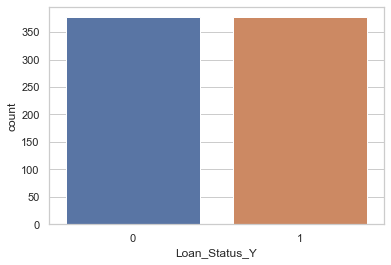

In [78]:
# Visualizing the data after oversampling
sns.countplot(y)

# Finding the best random state

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [88]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.20, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.8278145695364238  on Random State : 58


In [89]:
# dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.2, random_state=maxRS)

In [90]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(603, 13)
(603,)
(151, 13)
(151,)


In [91]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Now applying all the algoritmn for classification

In [92]:
#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
lr_model = LogisticRegression()
rd_model = RidgeClassifier()
dt_model = DecisionTreeClassifier()
sv_model = SVC()
knr_model = KNeighborsClassifier()
rfr_model = RandomForestClassifier()
xgb_model = XGBClassifier()
sgh_model = SGDClassifier()
Bag_model = BaggingClassifier()
ada_model = AdaBoostClassifier()
gbdt_model = GradientBoostingClassifier()

model = [lr_model,rd_model,dt_model,sv_model,knr_model,rfr_model,xgb_model,sgh_model,Bag_model,ada_model,gbdt_model]

In [94]:
for mod in model:
    mod.fit(x_train,y_train)
    mod.score(x_train,y_train)
    pred = mod.predict(x_test)
    print('Accuracy_Score of ',mod, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',mod,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('=' * 70)

Accuracy_Score of  LogisticRegression() is 82.78145695364239
Confusion Matrix of  LogisticRegression()  is 
 [[50 12]
 [14 75]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        62
           1       0.86      0.84      0.85        89

    accuracy                           0.83       151
   macro avg       0.82      0.82      0.82       151
weighted avg       0.83      0.83      0.83       151

Accuracy_Score of  RidgeClassifier() is 80.79470198675497
Confusion Matrix of  RidgeClassifier()  is 
 [[46 16]
 [13 76]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        62
           1       0.83      0.85      0.84        89

    accuracy                           0.81       151
   macro avg       0.80      0.80      0.80       151
weighted avg       0.81      0.81      0.81       151

Accuracy_Score of  DecisionTreeClassifier() is 53.64238410596026
Confusion Matrix of  DecisionTr

# Checking Cross Validation

In [99]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 10, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 82.78145695364239
cross Validation accuracy score of  LogisticRegression()  is  70.95789473684209
**************************************************
Accuracy_Score of  RidgeClassifier() is 80.79470198675497
cross Validation accuracy score of  RidgeClassifier()  is  70.95263157894738
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 53.64238410596026
cross Validation accuracy score of  DecisionTreeClassifier()  is  77.22105263157896
**************************************************
Accuracy_Score of  SVC() is 84.10596026490066
cross Validation accuracy score of  SVC()  is  75.33859649122807
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 79.47019867549669
cross Validation accuracy score of  KNeighborsClassifier()  is  74.39649122807019
**************************************************
Accuracy_Score of  RandomForestClassifier() is 60.9271523178808


# SVC MODEL has got more than 84 percent accuracy score so we will hypertune this model to check if further accuracy will improve or not

In [114]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.711 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.694 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.686 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.683 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.658 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.842 total time=   0.0s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.702 total time=   0.0s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.678 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.683 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.650 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 5/5] END .......C=10, ga

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.842 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.702 total time=  39.2s
[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.711 total time=  50.3s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.694 total time=  33.9s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.692 total time=  47.3s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.650 total time=  55.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.702 total time=  39.7s
[CV 2/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [116]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [123]:
sv_model = grid.best_estimator_
sv_model.fit(x_train,y_train)

SVC(C=100, gamma=1)

In [124]:
#Model Confidence/Accuracy

def metric_score(sv_model,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = sv_model.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = sv_model.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [125]:
#Call the function and pass dataset to check train and test score.
metric_score(sv_model,x_train,x_test,y_train,y_test,train = True)
metric_score(sv_model,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 99.67%

====================================Test Result================================
Accurancy Score: 76.82%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73        62
           1       0.83      0.76      0.80        89

    accuracy                           0.77       151
   macro avg       0.76      0.77      0.76       151
weighted avg       0.77      0.77      0.77       151



In [135]:

param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(sv_model,param_grid)

In [136]:
grid.fit(x,y)

GridSearchCV(estimator=SVC(C=1),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [137]:
grid.best_score_

0.7506136865342163

In [138]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [139]:
print(grid.best_estimator_)

SVC(C=1)


In [140]:
sv_model = grid.best_estimator_
sv_model.fit(x_train,y_train)

SVC(C=1)

In [141]:
def metric_score(sv_model,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = sv_model.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = sv_model.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [142]:
#Call the function and pass dataset to check train and test score.
metric_score(sv_model,x_train,x_test,y_train,y_test,train = True)
metric_score(sv_model,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 81.43%

====================================Test Result================================
Accurancy Score: 84.11%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        62
           1       0.87      0.85      0.86        89

    accuracy                           0.84       151
   macro avg       0.84      0.84      0.84       151
weighted avg       0.84      0.84      0.84       151



In [143]:
print(confusion_matrix(y_test,pred))

[[58  4]
 [64 25]]


# i can use two methods to hypertune the svc model ....i got accuracy score of 84% by second methos so we save this one as our best model.

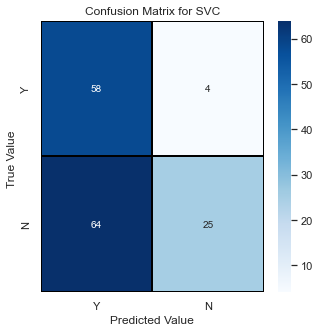

In [144]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for SVC')
plt.show()

# LETS PLOT ROC-AUC Curve

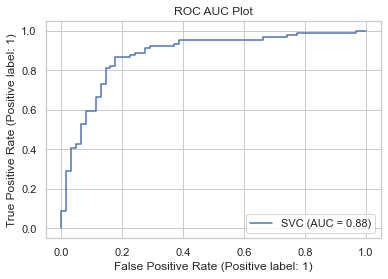

In [145]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(sv_model,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# accuracy improves to 88 percent

# Saving the best SVC Model

In [155]:
#Saving the best model to the local file system
best_model = 'final_model.pickle'
pickle.dump(sv_model, open('sv_model', 'wb'))

In [156]:
#Loading saved model
loaded_model = pickle.load(open('sv_model','rb'))

In [157]:
conclusion = loaded_model.predict(x_test)
conclusion

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
      dtype=uint8)

In [158]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
conclusion = pd.DataFrame({'Actual': y_test, 'Predicted': conclusion})
conclusion.head()

,Actual,Predicted
359,0,0
458,1,1
89,1,1
461,1,1
285,1,1


Text(0.5, 1.0, 'Original vs predicted  graph')

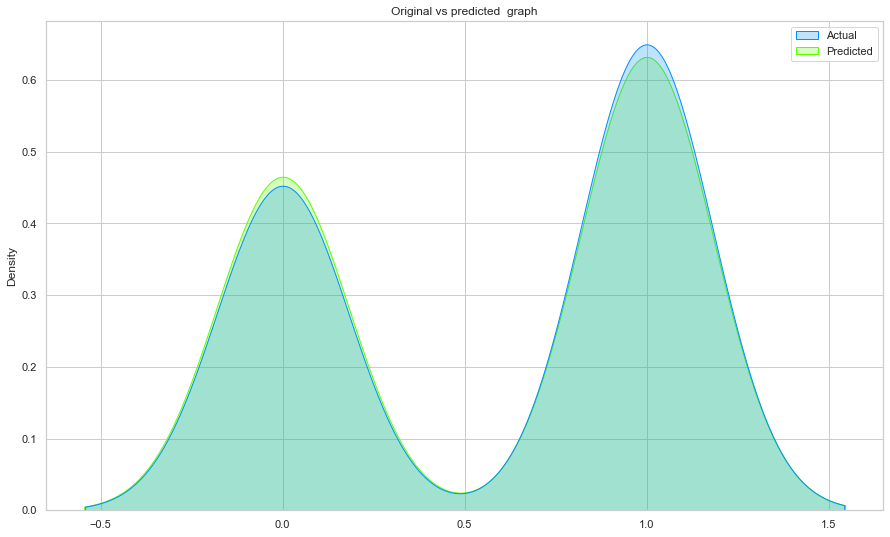

In [159]:
plt.figure(figsize=(15,9))
sns.kdeplot(data=conclusion, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')